In [1]:
import synphot
from astropy.io import ascii
import matplotlib.pyplot as plt

In [47]:
import pyphot
from pyphot import Filter
import sncosmo
import numpy as np
f_wavelength = np.arange(2000, 12000, 1)
bessellv = sncosmo.get_bandpass('bessellv')
sdssr = sncosmo.get_bandpass('sdssr')
sdssi = sncosmo.get_bandpass('sdssi')

# if lamb_T has units the Filter object will use those.
f_V = Filter(f_wavelength, bessellv(f_wavelength), name='bessellv', unit='Angstrom')
f_r = Filter(f_wavelength, sdssr(f_wavelength), name='sdssr', unit='Angstrom')
f_i = Filter(f_wavelength, sdssi(f_wavelength), name='sdssi', unit='Angstrom')


In [72]:
nxt_lc = ascii.read('./photometry/2020nxt_data.snana.txt') #data from YSE
nxt_lc.sort('MJD')
nxt_spec1 = ascii.read('./reduced_spectra/2020nxt/20nxt_optical/sn2020nxt-20200718.449.coadd.blotch-ui.flm')
nxt_spec2 = ascii.read('./reduced_spectra/2020nxt/20nxt_optical/sn2020nxt-20200728.435.coadd.blotch-ui.flm')
nxt_lc_2 = ascii.read('./photometry/lightcurve_2020nxt_all_psf_standard_sub.dat') # data from Weikang


18.443973529019466 18.477867517904887 18.883026079828753 18.86999332296773 18.862990464728536 18.896201679583395
16.9539485559537 17.059521280753454 17.220828487795934 17.045519672645497 17.217519717148146 17.17181803873333


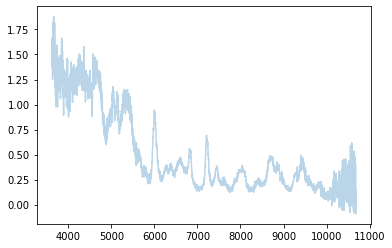

In [74]:
from pyphot import unit
import pyphot
import numpy as np

lib = pyphot.get_library()
f_wavelength = np.arange(2000, 12000, 1)

f = lib['GROUND_JOHNSON_B']

flux_B = f.get_flux(nxt_spec2['col1'].data* unit['AA'], 
                      nxt_spec2['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_B = -2.5 * np.log10(flux_B.value) - f.AB_zero_mag
flux_B1 = f.get_flux(nxt_spec1['col1'].data* unit['AA'], 
                      nxt_spec1['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_B1 = -2.5 * np.log10(flux_B1.value) - f.AB_zero_mag

f = lib['GROUND_JOHNSON_V']

flux_V = f.get_flux(nxt_spec2['col1'].data* unit['AA'], 
                      nxt_spec2['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_V = -2.5 * np.log10(flux_V.value) - f.AB_zero_mag
flux_V1 = f.get_flux(nxt_spec1['col1'].data* unit['AA'], 
                      nxt_spec1['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_V1 = -2.5 * np.log10(flux_V1.value) - f.AB_zero_mag

f = lib['GROUND_COUSINS_R']

flux_R = f.get_flux(nxt_spec2['col1'].data* unit['AA'], 
                      nxt_spec2['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_R = -2.5 * np.log10(flux_R.value) - f.AB_zero_mag
flux_R1 = f.get_flux(nxt_spec1['col1'].data* unit['AA'], 
                      nxt_spec1['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_R1 = -2.5 * np.log10(flux_R1.value) - f.AB_zero_mag

f = lib['GROUND_COUSINS_I']

flux_I = f.get_flux(nxt_spec2['col1'].data* unit['AA'], 
                      nxt_spec2['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_I = -2.5 * np.log10(flux_I.value) - f.AB_zero_mag
flux_I1 = f.get_flux(nxt_spec1['col1'].data* unit['AA'], 
                      nxt_spec1['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_I1 = -2.5 * np.log10(flux_I1.value) - f.AB_zero_mag

f = lib['SDSS_r']

flux_r = f.get_flux(nxt_spec2['col1'].data* unit['AA'], 
                      nxt_spec2['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_r = -2.5 * np.log10(flux_r.value) - f.AB_zero_mag
flux_r1 = f.get_flux(nxt_spec1['col1'].data* unit['AA'], 
                      nxt_spec1['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_r1 = -2.5 * np.log10(flux_r1.value) - f.AB_zero_mag

f = lib['SDSS_i']

flux_i = f.get_flux(nxt_spec2['col1'].data* unit['AA'], 
                      nxt_spec2['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_i = -2.5 * np.log10(flux_i.value) - f.AB_zero_mag
flux_i1 = f.get_flux(nxt_spec1['col1'].data* unit['AA'], 
                      nxt_spec1['col2'].data*1e-15* unit['erg/s/cm**2/AA'])
m_i1 = -2.5 * np.log10(flux_i1.value) - f.AB_zero_mag

print(m_B, m_V, m_R, m_I, m_r, m_i)
print(m_B1, m_V1, m_R1, m_I1, m_r1, m_i1)

#plt.plot(nxt_spec2['col1'],nxt_spec2['col2']/np.median(nxt_spec2['col2'])/3, alpha = 0.3)

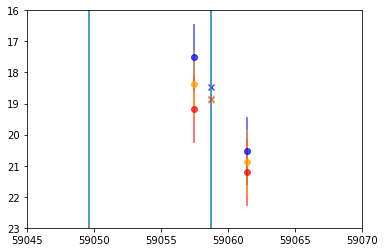

In [42]:
#comparison with YSE data
plt.errorbar(nxt_lc['MJD'][15:21:3], nxt_lc['MAG'][15:21:3], nxt_lc['MAGERR'][15:21:3], 
             marker = 'o', linestyle = 'None', color = 'b', alpha = 0.7)
plt.errorbar(nxt_lc['MJD'][16:21:3], nxt_lc['MAG'][16:21:3], nxt_lc['MAGERR'][16:21:3], 
             marker = 'o', linestyle = 'None', color = 'r', alpha = 0.7)
plt.errorbar(nxt_lc['MJD'][17:21:3], nxt_lc['MAG'][17:21:3], nxt_lc['MAGERR'][17:21:3], 
             marker = 'o', linestyle = 'None', color = 'orange', alpha = 0.7)
plt.scatter([59058.71533457176],[m_V],marker = 'x', linestyle = 'None', color = 'b', alpha = 0.7)
plt.scatter([59058.71533457176],[m_r],marker = 'x', linestyle = 'None', color = 'r', alpha = 0.7)
plt.scatter([59058.71533457176],[m_i],marker = 'x', linestyle = 'None', color = 'orange', alpha = 0.7)

plt.ylim(23,16)
plt.xlim(59045, 59070)
plt.axvline(59049.64291570602)
plt.axvline(59058.71533457176)

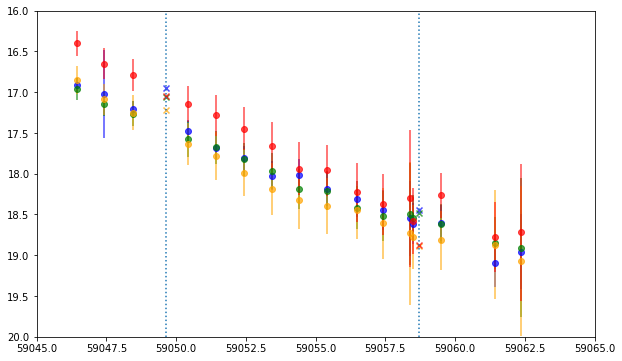

In [75]:
#COmparison with Weikang's data
plt.figure(figsize = (10, 6))
plt.errorbar(nxt_lc_2['MJD'], nxt_lc_2['B'], nxt_lc_2['EB'], 
             marker = 'o', linestyle = 'None', color = 'b', alpha = 0.7)
plt.errorbar(nxt_lc_2['MJD'], nxt_lc_2['V'], nxt_lc_2['EV'], 
             marker = 'o', linestyle = 'None', color = 'g', alpha = 0.7)
plt.errorbar(nxt_lc_2['MJD'], nxt_lc_2['R'], nxt_lc_2['ER'], 
             marker = 'o', linestyle = 'None', color = 'orange', alpha = 0.7)
plt.errorbar(nxt_lc_2['MJD'], nxt_lc_2['I'], nxt_lc_2['EI'], 
             marker = 'o', linestyle = 'None', color = 'r', alpha = 0.7)
plt.scatter([59049.64291570602,59058.71533457176],[m_B1,m_B],marker = 'x', linestyle = 'None', color = 'b', alpha = 0.7)
plt.scatter([59049.64291570602,59058.71533457176],[m_V1,m_V],marker = 'x', linestyle = 'None', color = 'g', alpha = 0.7)
plt.scatter([59049.64291570602,59058.71533457176],[m_R1,m_R],marker = 'x', linestyle = 'None', color = 'orange', alpha = 0.7)
plt.scatter([59049.64291570602,59058.71533457176],[m_I1,m_I],marker = 'x', linestyle = 'None', color = 'r', alpha = 0.7)

plt.ylim(20,16)
plt.xlim(59045, 59065)
plt.axvline(59049.64291570602, linestyle = ':')
plt.axvline(59058.71533457176, linestyle = ':')

In [85]:
B_line = np.polyfit(nxt_lc_2[:6]['MJD'],nxt_lc_2[:6]['B'],1)
print(B_line[1]+B_line[0]*59049.64291570602-m_B1)
V_line = np.polyfit(nxt_lc_2[:6]['MJD'],nxt_lc_2[:6]['V'],1)
print(V_line[1]+V_line[0]*59049.64291570602-m_V1)
R_line = np.polyfit(nxt_lc_2[:6]['MJD'],nxt_lc_2[:6]['R'],1)
print(R_line[1]+R_line[0]*59049.64291570602-m_R1)
I_line = np.polyfit(nxt_lc_2[:6]['MJD'],nxt_lc_2[:6]['I'],1)
print(I_line[1]+I_line[0]*59049.64291570602-m_I1)

0.4272767960926842
0.37698797378785187
0.2510156247573647
-0.05715436038215671


In [87]:
np.average([0.4272767960926842,0.37698797378785187,0.2510156247573647,-0.05715436038215671])

0.24953150856393602

In [69]:
np.average([m_B,m_R,m_V,m_I])

18.66871511243021

In [68]:
np.sum([18.613,18.538,18.778,18.583])/4.

18.628

In [20]:
nxt_lc[15:18]

VARLIST:,MJD,FLT,FLUXCAL,FLUXCALERR,MAG,MAGERR,MAGSYS,TELESCOPE,INSTRUMENT
str4,float64,str6,float64,float64,float64,float64,str4,str11,str12
OBS:,59057.473,V,9901.855,9901.855,17.511,1.086,None,Nickel,Direct/2Kx2K
OBS:,59057.488,r,2124.211,2124.211,19.182,1.086,None,Nickel,Direct/2Kx2K
OBS:,59057.494,i,4527.631,4527.631,18.36,1.086,None,Nickel,Direct/2Kx2K


In [43]:
aekp_lc = ascii.read('./photometry/2020nxt_data.snana.txt')
aekp_lc.sort('MJD')
aekp_lc
#nxt_spec2 = ascii.read('./reduced_spectra/2020nxt/20nxt_optical/sn2020nxt-20200728.435.coadd.blotch-ui.flm')

VARLIST:,MJD,FLT,FLUXCAL,FLUXCALERR,MAG,MAGERR,MAGSYS,TELESCOPE,INSTRUMENT
str4,float64,str6,float64,float64,float64,float64,str4,str11,str12
OBS:,59033.537,orange,13280.059,330.247,17.192,0.027,None,ATLAS,HKO
OBS:,59046.11,UVW1,17540.421,468.537,16.89,0.029,None,Swift,UVOT
OBS:,59046.112,U,28736.414,717.701,16.354,0.027,None,Swift,UVOT
OBS:,59046.113,B,53024.639,1030.555,15.689,0.021,None,Swift,UVOT
OBS:,59046.114,UVW2,9999.047,270.797,17.5,0.029,None,Swift,UVOT
OBS:,59046.117,V,58828.685,1839.497,15.576,0.034,None,Swift,UVOT
OBS:,59046.118,UVM2,9380.924,692.333,17.569,0.08,None,Swift,UVOT
OBS:,59052.482,B,9150.198,148.94,17.596,0.018,None,Nickel,Direct/2Kx2K
OBS:,59052.484,V,9642.818,138.191,17.54,0.016,None,Nickel,Direct/2Kx2K


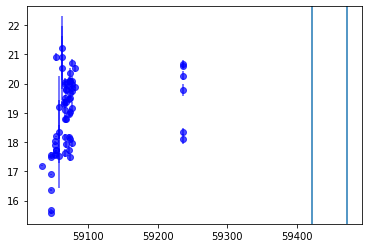

In [46]:
plt.errorbar(aekp_lc['MJD'], aekp_lc['MAG'], aekp_lc['MAGERR'], 
             marker = 'o', linestyle = 'None', color = 'b', alpha = 0.7)


plt.axvline(59421.834203935185)
plt.axvline(59471.93836021991)